In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing required libraries**

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

**Loading the data**

In [ ]:
import dask.dataframe as dd

full_data = dd.read_csv("/content/drive/MyDrive/US_Accidents_March23.csv")

print(full_data.head())

print("Before Cleaning - Dimensions of the data:", full_data.shape)

df_cleaned = full_data.dropna()

#print("After Cleaning - Dimensions of the cleaned data:", df_cleaned.shape[0].compute())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
start_time = dd.to_datetime(df_cleaned['Start_Time'], format='ISO8601', errors = 'coerce')
df_cleaned['start_year'] = start_time.dt.year
df_cleaned['start_month'] = start_time.dt.month
df_cleaned['start_day'] = start_time.dt.day
df_cleaned['start_hour'] = start_time.dt.hour
df_cleaned['DayOfWeek'] = start_time.dt.day_name()
#recent_data = df_cleaned[df_cleaned['start_year'] >= 2021] Removed as Severity has only 2 and 4 values which would cause issue in training
print("After Cleaning - Dimensions of the cleaned data:", df_cleaned.shape[0].compute())

After Cleaning - Dimensions of the cleaned data: 3554549


**Checking for NULL values**

In [ ]:
df_cleaned.isnull().sum().compute()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,0
End_Lng,0
Distance(mi),0


**Randomly sampling the data**

In [ ]:
sampled_data = df_cleaned.sample(frac = 0.3)
sampled_data.to_csv('sampled_us_accidents_data.csv', index = False, single_file = True )

['/content/sampled_us_accidents_data.csv']

In [ ]:
data = pd.read_csv("/content/sampled_us_accidents_data.csv")

print(data.head())

print("Dimensions of the data:", data.shape)
#print(data.dtypes)

          ID   Source  Severity           Start_Time             End_Time  \
0  A-3446918  Source1         2  2016-12-06 06:24:55  2016-12-06 12:24:55   
1  A-3446479  Source1         2  2016-12-05 06:33:42  2016-12-05 12:33:42   
2  A-3420619  Source1         2  2016-05-05 08:24:57  2016-05-05 14:24:57   
3  A-3465443  Source1         2  2016-10-27 18:43:45  2016-10-28 00:43:45   
4  A-3456683  Source1         2  2017-01-06 05:57:41  2017-01-06 11:57:41   

   Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  ...  \
0  35.154630  -80.794820  35.154510  -80.794920         0.010  ...   
1  40.028140  -75.024010  40.020889  -75.042594         1.104  ...   
2  34.451940 -118.614820  34.459400 -118.615360         0.516  ...   
3  42.931986  -78.763634  42.932370  -78.764740         0.062  ...   
4  40.726180  -73.903390  40.728750  -73.909110         0.348  ...   

  Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
0        False          Night          Night      

In [ ]:
data.isnull().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,0
End_Lng,0
Distance(mi),0


**Converting all categorical values to numerical values**

In [ ]:
data.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Time,object
End_Time,object
Start_Lat,float64
Start_Lng,float64
End_Lat,float64
End_Lng,float64
Distance(mi),float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in data.columns:
  if data[column].dtype == 'bool':
    data[column] = label_encoder.fit_transform(data[column]).astype(int)

data.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_year,start_month,start_day,start_hour,DayOfWeek
0,A-3446918,Source1,2,2016-12-06 06:24:55,2016-12-06 12:24:55,35.154630,-80.794820,35.154510,-80.794920,0.010,...,0,Night,Night,Day,Day,2016,12,6,6,Tuesday
1,A-3446479,Source1,2,2016-12-05 06:33:42,2016-12-05 12:33:42,40.028140,-75.024010,40.020889,-75.042594,1.104,...,0,Night,Night,Day,Day,2016,12,5,6,Monday
2,A-3420619,Source1,2,2016-05-05 08:24:57,2016-05-05 14:24:57,34.451940,-118.614820,34.459400,-118.615360,0.516,...,0,Day,Day,Day,Day,2016,5,5,8,Thursday
3,A-3465443,Source1,2,2016-10-27 18:43:45,2016-10-28 00:43:45,42.931986,-78.763634,42.932370,-78.764740,0.062,...,0,Night,Night,Day,Day,2016,10,27,18,Thursday
4,A-3456683,Source1,2,2017-01-06 05:57:41,2017-01-06 11:57:41,40.726180,-73.903390,40.728750,-73.909110,0.348,...,0,Night,Night,Night,Day,2017,1,6,5,Friday


In [ ]:
print(data['Severity'].unique())

[2 4 3 1]


**Finding Rush hour**

<ipython-input-13-4eed20b1070d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  hrs = pd.value_counts(data['start_hour'].values)


16    85347
15    84583
17    82698
14    74843
13    63226
18    60091
12    53469
7     52882
8     48098
11    43947
19    42460
6     41920
9     39017
10    38643
20    35682
21    33791
22    30741
5     27925
23    26902
0     24492
1     21194
2     19750
4     17629
3     17035
Name: count, dtype: int64


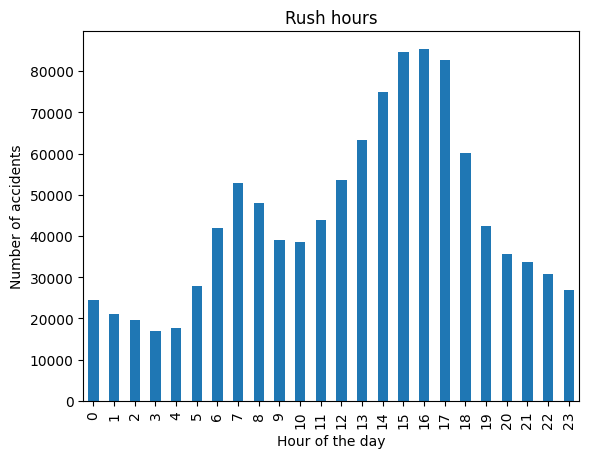

In [ ]:
hrs = pd.value_counts(data['start_hour'].values)
print(hrs)
hrs = hrs.sort_index()
hrs.plot.bar()
plt.xlabel("Hour of the day")
plt.ylabel("Number of accidents")
plt.title("Rush hours")
plt.show()

**Severity Distribution**

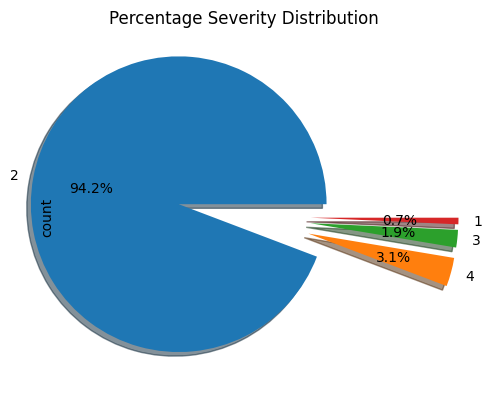

In [ ]:
data['Severity'].value_counts().plot.pie(explode=[0.45,0.45,0.45,0.45], autopct = '%1.1f%%',shadow = True)
plt.title("Percentage Severity Distribution")
plt.show()

**Top 10 accident prone states**

['NC' 'PA' 'CA' 'NY' 'OK' 'MN' 'MD' 'NH' 'LA' 'MI' 'TX' 'ME' 'IL' 'MO'
 'MA' 'OH' 'WI' 'IN' 'GA' 'CT' 'NJ' 'TN' 'KY' 'CO' 'VA' 'WY' 'AR' 'FL'
 'IA' 'DE' 'RI' 'WV' 'NE' 'KS' 'SD' 'SC' 'MS' 'VT' 'ND' 'WA' 'ID' 'OR'
 'MT' 'AZ' 'UT' 'NV' 'NM' 'AL' 'DC']


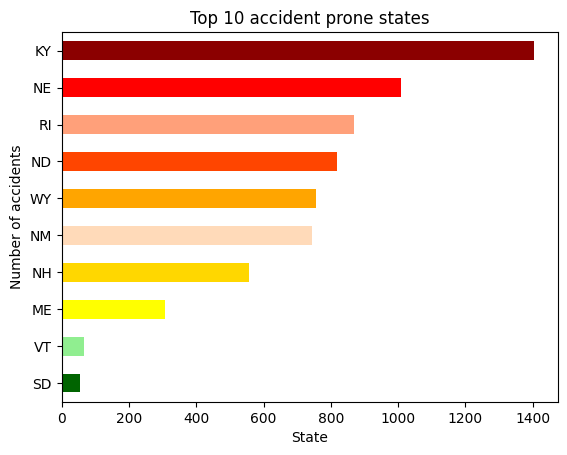

In [ ]:
print(data['State'].unique())
colors = ['#8B0000', '#FF0000', '#FFA07A', '#FF4500', '#FFA500', '#FFDAB9', '#FFD700', '#FFFF00', '#90EE90', '#006400']
colors = colors[::-1]
data['State'].value_counts().sort_values(ascending = True).head(10).plot.barh(color=colors)
plt.xlabel("State")
plt.ylabel("Number of accidents")
plt.title("Top 10 accident prone states")
plt.show()

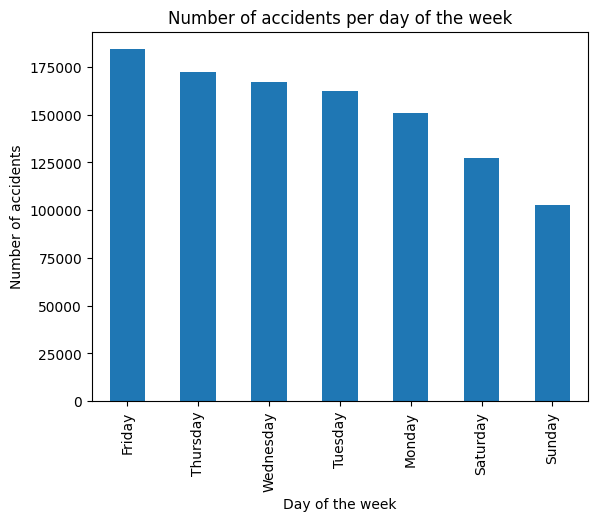

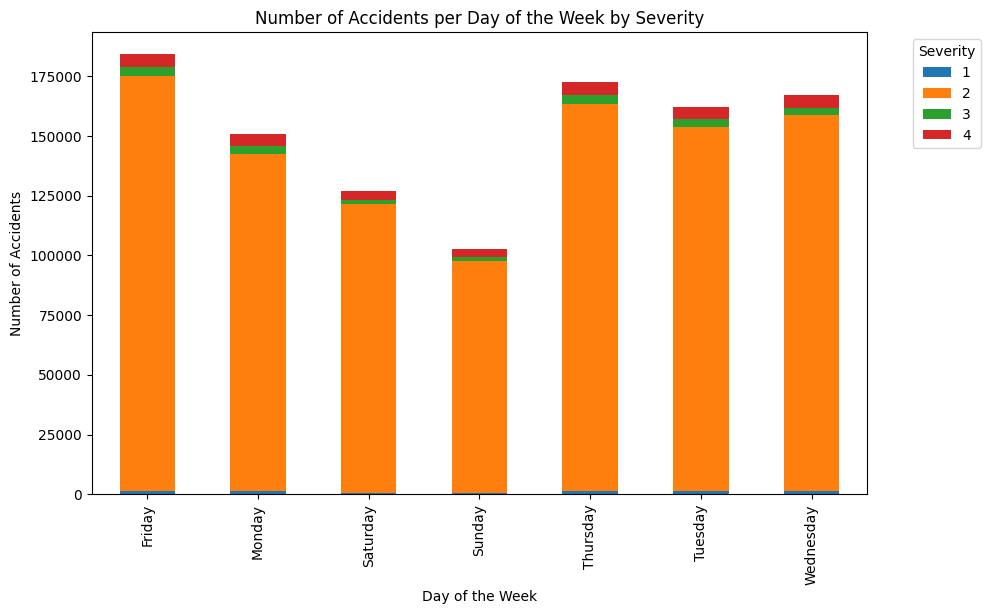

In [ ]:
data['DayOfWeek'].value_counts().plot.bar()
plt.xlabel("Day of the week")
plt.ylabel("Number of accidents")
plt.title("Number of accidents per day of the week")
plt.show()

# Aggregate data based on DayOfWeek and Severity
severity_counts = pd.crosstab(data['DayOfWeek'], data['Severity'])

severity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Day of the Week by Severity")
plt.legend(title="Severity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Identifying Hotspots using Folium**

In [ ]:
from folium.plugins import MarkerCluster
import folium

def create_map_with_clustering(df):
    m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
    marker_cluster = MarkerCluster().add_to(m)

    colors = {
        1: 'purple',
        2: 'green',
        3: 'orange',
        4: 'red'
    }

    for index, row in df.iterrows():
        lat = row['Start_Lat']
        lon = row['Start_Lng']
        severity = row['Severity']

        if not pd.isnull(lat) and not pd.isnull(lon):
            folium.CircleMarker(
                location=[lat, lon],
                radius=2,
                color=colors[severity],
                fill=True,
                fill_color=colors[severity]
            ).add_to(marker_cluster)

    return m

df_loc = data.loc[(~data.Start_Lat.isna()) & (~data.Start_Lng.isna())]
output_map = create_map_with_clustering(df_loc)
output_map.save('MarkerClustermap.html')


In [ ]:
from folium.plugins import HeatMap


def create_heatmap(df):
    m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

    # Prepare heatmap data as a list of [latitude, longitude]
    heatmap_data = df[['Start_Lat', 'Start_Lng']].dropna().values.tolist()

    HeatMap(heatmap_data, radius=8).add_to(m)
    return m

df_loc = data.loc[(~data.Start_Lat.isna()) & (~data.Start_Lng.isna())]
output_map = create_heatmap(df_loc)
output_map
output_map.save('heatmap.html')

**Effect of Weather Conditions**

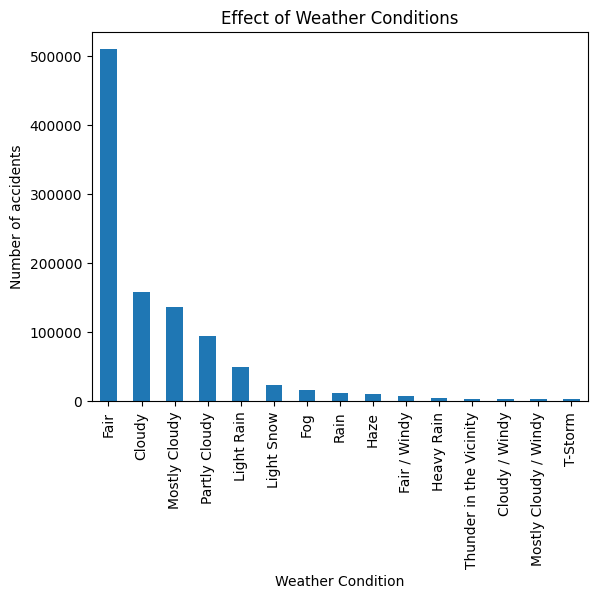

In [ ]:
weather_conditions = data.groupby(['Weather_Condition']).size()
sorted_weather_conditions = weather_conditions.sort_values(ascending = False)
sorted_weather_conditions[0:15].plot.bar()
plt.xlabel("Weather Condition")
plt.ylabel("Number of accidents")
plt.title("Effect of Weather Conditions")
plt.show()

**Classifying accident severity based on Weather conditions**

Epoch 1/10
21328/21328 [==============================] - 39s 2ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 2/10
21328/21328 [==============================] - 37s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 3/10
21328/21328 [==============================] - 36s 2ms/step - loss: 9.1863e-04 - accuracy: 0.9997 - val_loss: 7.8143e-04 - val_accuracy: 0.9996
Epoch 4/10
21328/21328 [==============================] - 36s 2ms/step - loss: 8.5088e-04 - accuracy: 0.9997 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 5/10
21328/21328 [==============================] - 37s 2ms/step - loss: 6.9910e-04 - accuracy: 0.9998 - val_loss: 6.3977e-04 - val_accuracy: 0.9998
Epoch 6/10
21328/21328 [==============================] - 37s 2ms/step - loss: 6.1488e-04 - accuracy: 0.9998 - val_loss: 2.9316e-04 - val_accuracy: 0.9998
Epoch 7/10
21328/21328 [==============================] - 36s 2ms/step - loss: 3.7104e-04 

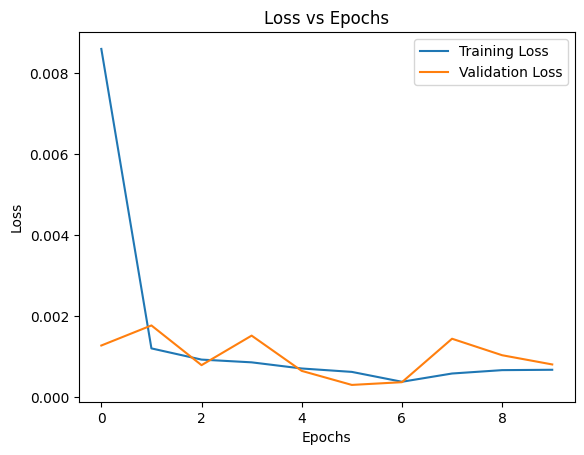

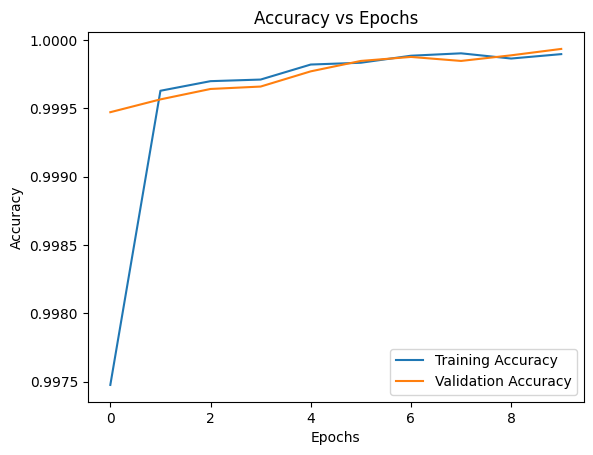

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

weather_data = data[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
                    'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Severity']]

# Convert categorical features to numerical using one-hot encoding
categorical_features = ['Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset']
weather_data = pd.get_dummies(weather_data, columns=categorical_features) # Using pandas get_dummies for one-hot encoding

X = weather_data.iloc[:, :-1].values
y = weather_data.iloc[:, -1].values

y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

score, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

6665/6665 [==============================] - 7s 975us/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


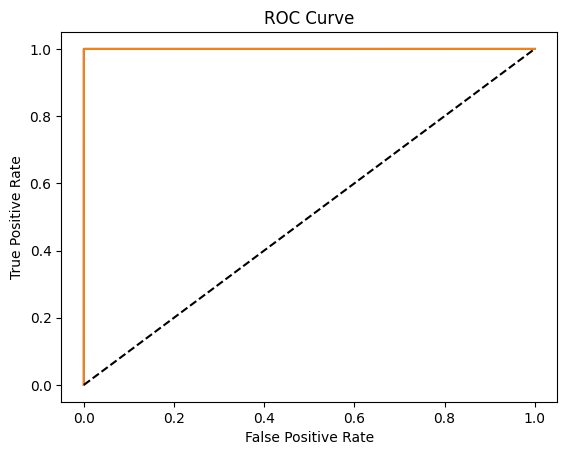

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_bin = model.predict(X_test)

for i in range(4):  # Assuming 4 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


**Classifying accident severity based on Road conditions**

Epoch 1/10
21328/21328 [==============================] - 39s 2ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 2/10
21328/21328 [==============================] - 37s 2ms/step - loss: 9.0433e-04 - accuracy: 0.9997 - val_loss: 4.3225e-04 - val_accuracy: 0.9999
Epoch 3/10
21328/21328 [==============================] - 37s 2ms/step - loss: 9.7218e-04 - accuracy: 0.9997 - val_loss: 5.4733e-04 - val_accuracy: 0.9998
Epoch 4/10
21328/21328 [==============================] - 38s 2ms/step - loss: 6.4654e-04 - accuracy: 0.9997 - val_loss: 5.8351e-04 - val_accuracy: 0.9997
Epoch 5/10
21328/21328 [==============================] - 38s 2ms/step - loss: 6.5681e-04 - accuracy: 0.9998 - val_loss: 0.0010 - val_accuracy: 0.9998
Epoch 6/10
21328/21328 [==============================] - 36s 2ms/step - loss: 5.8516e-04 - accuracy: 0.9998 - val_loss: 6.5635e-04 - val_accuracy: 0.9999
Epoch 7/10
21328/21328 [==============================] - 37s 2ms/step - loss: 5.3

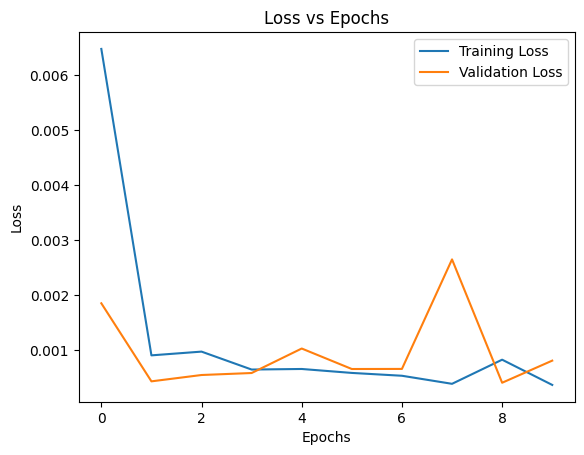

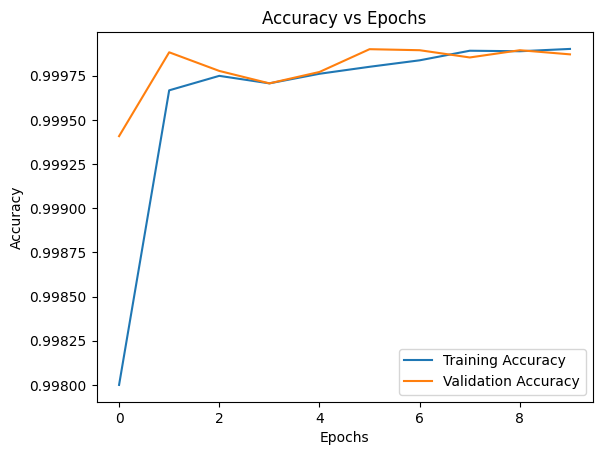

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from sklearn.model_selection import train_test_split

roadlayout_data = data[['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop',
                        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Severity']]

X = weather_data.iloc[:, :-1].values
y = weather_data.iloc[:, -1].values

y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

score, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

6665/6665 [==============================] - 7s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


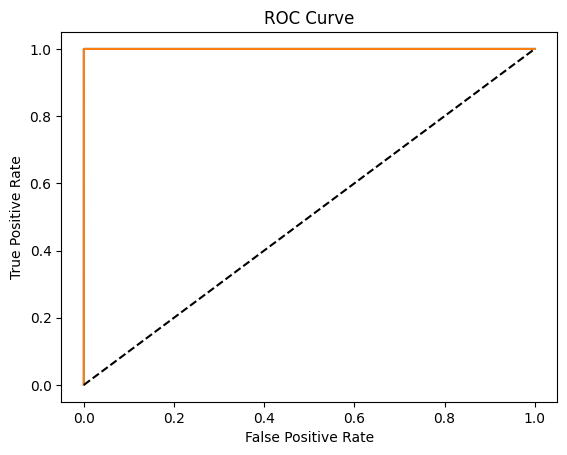

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_pred_bin = model.predict(X_test)

for i in range(4):  # Assuming 4 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
